In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import os
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, HistGradientBoostingRegressor


import mlflow
import mlflow.sklearn

In [9]:
os.environ['USER'] = 'Ruslan'
mlflow.set_tracking_uri("http://localhost:5005")


In [10]:
df = pd.read_excel(r'C:\Users\User\Desktop\oil\data.xlsx')

In [11]:
sns.set_style("whitegrid")
sns.set_palette("husl")  # –ö—Ä–∞—Å–∏–≤–∞—è –ø–∞–ª–∏—Ç—Ä–∞ —Ü–≤–µ—Ç–æ–≤

# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –∫–æ–ª–æ–Ω–∫–∏
numeric_cols = df.select_dtypes(include=[float, int]).columns

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ä–∞–∑–º–µ—Ä —Å–µ—Ç–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, ceil(sqrt(n)) –¥–ª—è –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–π —Ñ–æ—Ä–º—ã)
n_cols = len(numeric_cols)
n_rows = int(n_cols ** 0.5) + 1
n_cols_grid = int(n_cols / n_rows) + 1

fig, axes = plt.subplots(n_rows, n_cols_grid, figsize=(12, 8), sharex=False, sharey=False)
axes = axes.flatten()  # –ü—Ä–µ–≤—Ä–∞—â–∞–µ–º –≤ 1D-–º–∞—Å—Å–∏–≤ –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], alpha=0.7)  # –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Å KDE
    axes[i].set_title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞' if i % n_cols_grid == 0 else '')  # –ü–æ–¥–ø–∏—Å—å —Ç–æ–ª—å–∫–æ —Å–ª–µ–≤–∞

# –£–±–∏—Ä–∞–µ–º –ø—É—Å—Ç—ã–µ —Å—É–±–ø–ª–æ—Ç—ã, –µ—Å–ª–∏ –∫–æ–ª–æ–Ω–æ–∫ –º–µ–Ω—å—à–µ —è—á–µ–µ–∫
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
plt.suptitle('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫', fontsize=12, y=0.98)  # –û–±—â–∏–π –∑–∞–≥–æ–ª–æ–≤–æ–∫
plt.show()


In [12]:
corr=df.select_dtypes(include=['float','int']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞')
plt.show()

In [13]:
df.select_dtypes(include=['object']).value_counts()

GS    
GS        3348
NGS       1080
VGS       1080
S-TYPE     648
U-TYPE     648
Name: count, dtype: int64

In [14]:
x=df.drop(['cond rate','gas rate','sum cond','sum gas','NPV'],axis=1)
y=df['NPV']

In [15]:
# One-Hot Encoding –¥–ª—è GS
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' –∏–∑–±–µ–≥–∞–µ—Ç –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏
encoded_cols = encoder.fit_transform(x[['GS']])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['GS']))
X = pd.concat([x.drop('GS', axis=1), encoded_df], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
mlflow.set_experiment("Models_NPV")

<Experiment: artifact_location='file:///C:/Users/User/Desktop/oil/mlflow/data_local/270350811286877226', creation_time=1758616366666, experiment_id='270350811286877226', last_update_time=1758616366666, lifecycle_stage='active', name='Models_NPV', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

def test_model(model, param_grid, model_name, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    with mlflow.start_run(run_name=model_name):
        grid_search.fit(X_train, y_train)
        
        mlflow.log_params(grid_search.best_params_)
        print(f"–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è {model_name}:", grid_search.best_params_)
        print(f"–õ—É—á—à–µ–µ R2 –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {grid_search.best_score_:.4f}")
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        r2_val = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        mlflow.log_metric('MAE', mae)
        mlflow.log_metric('R2', r2_val)  # –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–æ —Å r2 –Ω–∞ r2_val
        mlflow.log_metric('MAPE', mape)
        mlflow.sklearn.log_model(best_model, "best_model")
        
        print(f"–¢–µ—Å—Ç–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è {model_name}:")
        print(f"  MAE = {mae:.2f}")
        print(f"  R2  = {r2_val:.4f}")
        print(f"  MAPE = {mape:.2%}")
        print("-" * 50)
        
        return best_model, mape


In [28]:
#–º–æ–¥–µ–ª–∏ –¥–ª—è —Ç–µ—Å—Ç–∞
models_to_test = [
    # –ê–Ω—Å–∞–º–±–ª–µ–≤—ã–µ –º–µ—Ç–æ–¥—ã (–≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –±—É—Å—Ç–∏–Ω–≥)
    (XGBRegressor(random_state=42, objective='reg:squarederror'), 
     {'n_estimators': [100, 500], 'learning_rate': [0.01, 0.1], 
      'max_depth': [4, 6], 'subsample': [0.8, 0.9]}, "XGBoost"),
    
    (LGBMRegressor(random_state=42, verbose=-1), 
     {'n_estimators': [100, 500], 'learning_rate': [0.01, 0.1], 
      'max_depth': [4, 6], 'subsample': [0.8, 0.9]}, "LightGBM"),
    
    (CatBoostRegressor(random_state=42, verbose=False),
     {'iterations': [100, 500], 'learning_rate': [0.01, 0.1], 
      'depth': [4, 6], 'l2_leaf_reg': [1, 3]}, "CatBoost"),
    
    (GradientBoostingRegressor(random_state=42),
     {'n_estimators': [100, 500], 'learning_rate': [0.01, 0.1], 
      'max_depth': [3, 4], 'subsample': [0.8, 0.9]}, "GradientBoosting"),
    
    (HistGradientBoostingRegressor(random_state=42),
     {'max_iter': [100, 500], 'learning_rate': [0.01, 0.1], 
      'max_depth': [4, 6], 'l2_regularization': [0, 1]}, "HistGradientBoosting"),
    
    # –ê–Ω—Å–∞–º–±–ª–µ–≤—ã–µ –º–µ—Ç–æ–¥—ã (–±—ç–≥–≥–∏–Ω–≥)
    (RandomForestRegressor(random_state=42),
     {'n_estimators': [100, 500], 'max_depth': [4, 6, None], 
      'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}, "RandomForest"),
    
    (ExtraTreesRegressor(random_state=42),
     {'n_estimators': [100, 500], 'max_depth': [4, 6, None], 
      'min_samples_split': [2, 5]}, "ExtraTrees"),
    
    # –î—Ä—É–≥–∏–µ –∞–Ω—Å–∞–º–±–ª–µ–≤—ã–µ –º–µ—Ç–æ–¥—ã
    (AdaBoostRegressor(random_state=42),
     {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]}, "AdaBoost"),
    
    # –õ–∏–Ω–µ–π–Ω—ã–µ –º–æ–¥–µ–ª–∏
    (Ridge(random_state=42),
     {'alpha': [0.1, 1.0, 10.0, 100.0], 'solver': ['auto', 'svd']}, "Ridge"),
    
    (Lasso(random_state=42),
     {'alpha': [0.1, 1.0, 10.0], 'max_iter': [1000, 5000]}, "Lasso"),
    
    (ElasticNet(random_state=42),
     {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}, "ElasticNet"),
    
    (BayesianRidge(),
     {'alpha_1': [1e-6, 1e-5], 'alpha_2': [1e-6, 1e-5], 
      'lambda_1': [1e-6, 1e-5], 'lambda_2': [1e-6, 1e-5]}, "BayesianRidge"),
    
    # –ú–µ—Ç–æ–¥—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å–æ—Å–µ–¥–µ–π
    (KNeighborsRegressor(),
     {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 
      'metric': ['euclidean', 'manhattan']}, "KNeighbors"),
    
    # SVM
    (SVR(),
     {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf'], 
      'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2]}, "SVR"),
    
    # –ù–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏
    (MLPRegressor(random_state=42, max_iter=1000),
     {'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], 
      'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001],
      'learning_rate_init': [0.001, 0.01]}, "MLP"),
    
    # –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π
    (DecisionTreeRegressor(random_state=42),
     {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10], 
      'min_samples_leaf': [1, 2, 4]}, "DecisionTree")
]

In [35]:
#–º–æ–¥–µ–ª–∏ –¥–ª—è —Ç–µ—Å—Ç–∞
models_to_test = [
    # SVM
    #(SVR(),
     #{'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf'], 
      #'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2]}, "SVR"),
    
    # –ù–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏
    (MLPRegressor(random_state=42, max_iter=1000),
     {'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], 
      'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001],
      'learning_rate_init': [0.001, 0.01]}, "MLP"),
    
    # –î–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π
    (DecisionTreeRegressor(random_state=42),
     {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10], 
      'min_samples_leaf': [1, 2, 4]}, "DecisionTree")
]

In [34]:
#—Ü–∏–∫–ª –æ–±—É—á–µ–Ω–∏–π
#best_models = {}
for model, params, name in models_to_test:
    best_model, mape = test_model(model, params, name, X_train, y_train, X_test, y_test)
    best_models[name] = (best_model, mape)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


2025/09/23 13:02:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è MLP: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001}
–õ—É—á—à–µ–µ R2 –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9452


2025/09/23 13:02:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


–¢–µ—Å—Ç–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è MLP:
  MAE = 78.29
  R2  = 0.8794
  MAPE = 77.71%
--------------------------------------------------
üèÉ View run MLP at: http://localhost:5005/#/experiments/270350811286877226/runs/c6e75356fda84a2d80e24c53e8a560dc
üß™ View experiment at: http://localhost:5005/#/experiments/270350811286877226
Fitting 5 folds for each of 36 candidates, totalling 180 fits


2025/09/23 13:02:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è DecisionTree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
–õ—É—á—à–µ–µ R2 –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9987


2025/09/23 13:02:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


–¢–µ—Å—Ç–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è DecisionTree:
  MAE = 2.09
  R2  = 0.9995
  MAPE = 2.70%
--------------------------------------------------
üèÉ View run DecisionTree at: http://localhost:5005/#/experiments/270350811286877226/runs/3bd0d23d49154aacbec2af7d529e3a28
üß™ View experiment at: http://localhost:5005/#/experiments/270350811286877226


–¢–µ—Å—Ç–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è XGBoost:
  MAE = 2.39
  R2  = 1.00
  MAPE= 2.43%


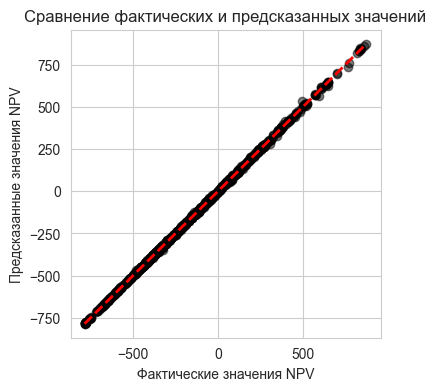

In [43]:
# –û—Ü–µ–Ω–∏–≤–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"–¢–µ—Å—Ç–æ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è XGBoost:")
print(f"  MAE = {mae:.2f}")
print(f"  R2  = {r2:.2f}")
print(f"  MAPE= {mape:.2%}")

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –º–æ–¥–µ–ª–∏

# 1. Scatter plot: –§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ vs. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è NPV')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è NPV')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π')
plt.grid(True)
plt.show()


–¢–æ–ø-10 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
      –ü—Ä–∏–∑–Ω–∞–∫  –í–∞–∂–Ω–æ—Å—Ç—å
1        Perm  0.531540
0        Heff  0.267745
2          Sg  0.091130
3       L_hor  0.063031
5          C5  0.016295
4        temp  0.015308
6         GRP  0.012939
11     GS_VGS  0.000686
8      GS_NGS  0.000684
10  GS_U-TYPE  0.000549


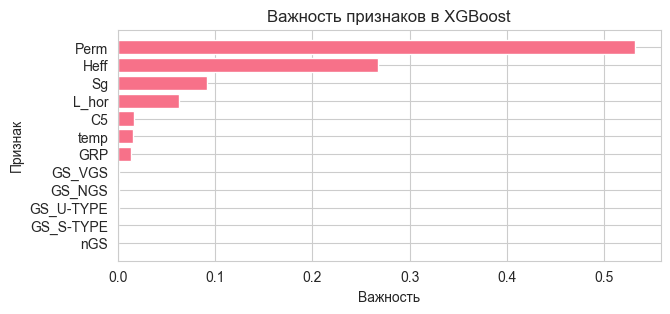

In [45]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importances = best_model.feature_importances_
feature_names = X_train.columns  # –ù–∞–∑–≤–∞–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

# –°–æ–∑–¥–∞–µ–º DataFrame –¥–ª—è —É–¥–æ–±–Ω–æ–≥–æ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
importance_df = pd.DataFrame({
    '–ü—Ä–∏–∑–Ω–∞–∫': feature_names,
    '–í–∞–∂–Ω–æ—Å—Ç—å': feature_importances
}).sort_values(by='–í–∞–∂–Ω–æ—Å—Ç—å', ascending=False)

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ø-10 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –∫–æ–Ω—Å–æ–ª—å
print("\n–¢–æ–ø-10 –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
print(importance_df.head(10))

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
plt.barh(importance_df['–ü—Ä–∏–∑–Ω–∞–∫'][:20], importance_df['–í–∞–∂–Ω–æ—Å—Ç—å'][:20])  # –¢–æ–ø-20 –¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å')
plt.ylabel('–ü—Ä–∏–∑–Ω–∞–∫')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ XGBoost')
plt.gca().invert_yaxis()  # –ò–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –æ—Å—å Y –¥–ª—è –ª—É—á—à–µ–≥–æ –≤–∏–¥–∞
plt.show()